**Step 1: Load Data from Excel File**

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = '/content/online retail.xlsx'
df = pd.read_excel(file_path)
df.dtypes

,0
Invoice,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
Price,float64
Customer ID,float64
Country,object


In [7]:
df_2009_2010 = pd.read_excel(file_path, sheet_name='Year 2009-2010')
df_2010_2011 = pd.read_excel(file_path, sheet_name='Year 2010-2011')

df_2009_2010.head(), df_2010_2011.head()

(  Invoice StockCode                          Description  Quantity  \
 0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
 1  489434    79323P                   PINK CHERRY LIGHTS        12   
 2  489434    79323W                  WHITE CHERRY LIGHTS        12   
 3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
 4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
 
           InvoiceDate  Price  Customer ID         Country  
 0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
 1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
 2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
 3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
 4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  ,
   Invoice StockCode                          Description  Quantity  \
 0  536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
 1  536365     71053                  WHITE METAL LANTERN      

**Step 2: Data Inspection**

In [23]:

print("Missing values in 2009-2010 dataset:")
print(df_2009_2010.isnull().sum())


print("\nMissing values in 2010-2011 dataset:")
print(df_2010_2011.isnull().sum())


print("\nData types in 2009-2010 dataset:")
print(df_2009_2010.dtypes)

print("\nData types in 2010-2011 dataset:")
print(df_2010_2011.dtypes)

Missing values in 2009-2010 dataset:
Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

Missing values in 2010-2011 dataset:
Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

Data types in 2009-2010 dataset:
Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

Data types in 2010-2011 dataset:
Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country        

**Step 3: Data Cleaning**

In [24]:
# Drop rows with missing Customer ID as it's crucial for reconciliation
df_2009_2010_clean = df_2009_2010.dropna(subset=['Customer ID'])
df_2010_2011_clean = df_2010_2011.dropna(subset=['Customer ID'])


df_2009_2010_clean = df_2009_2010_clean.drop_duplicates()
df_2010_2011_clean = df_2010_2011_clean.drop_duplicates()

print("Data cleaned successfully.")

Data cleaned successfully.


**Step 4: Reconciliation Process**

We’ll reconcile the data by identifying inconsistencies across the two years. This could include mismatched Quantity, Price, or Invoice values. We’ll perform this reconciliation using merge.

Reconcile data based on Invoice, StockCode, and Customer ID

In [25]:
# Merge the two datasets to identify discrepancies across both years
reconciled_data = pd.merge(df_2009_2010_clean, df_2010_2011_clean, on=['Invoice', 'StockCode', 'Customer ID'], how='outer', suffixes=('_2009_2010', '_2010_2011'))

# Check for rows where Quantity, Price, or other key metrics don’t match across the two years
discrepancies = reconciled_data[(reconciled_data['Quantity_2009_2010'] != reconciled_data['Quantity_2010_2011']) |
                                (reconciled_data['Price_2009_2010'] != reconciled_data['Price_2010_2011'])]

print(f"Number of discrepancies found: {len(discrepancies)}")
discrepancies.head()

Number of discrepancies found: 783924


,Invoice,StockCode,Description_2009_2010,Quantity_2009_2010,InvoiceDate_2009_2010,Price_2009_2010,Customer ID,Country_2009_2010,Description_2010_2011,Quantity_2010_2011,InvoiceDate_2010_2011,Price_2010_2011,Country_2010_2011
0,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,NaN,NaN,NaT,NaN,NaN
1,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10.0,2009-12-01 07:45:00,5.95,13085.0,United Kingdom,NaN,NaN,NaT,NaN,NaN
2,489434,21871,SAVE THE PLANET MUG,24.0,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,NaN,NaN,NaT,NaN,NaN
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,NaN,NaN,NaT,NaN,NaN
4,489434,22064,PINK DOUGHNUT TRINKET POT,24.0,2009-12-01 07:45:00,1.65,13085.0,United Kingdom,NaN,NaN,NaT,NaN,NaN


**Step 5: Visualization of Reconciliation**

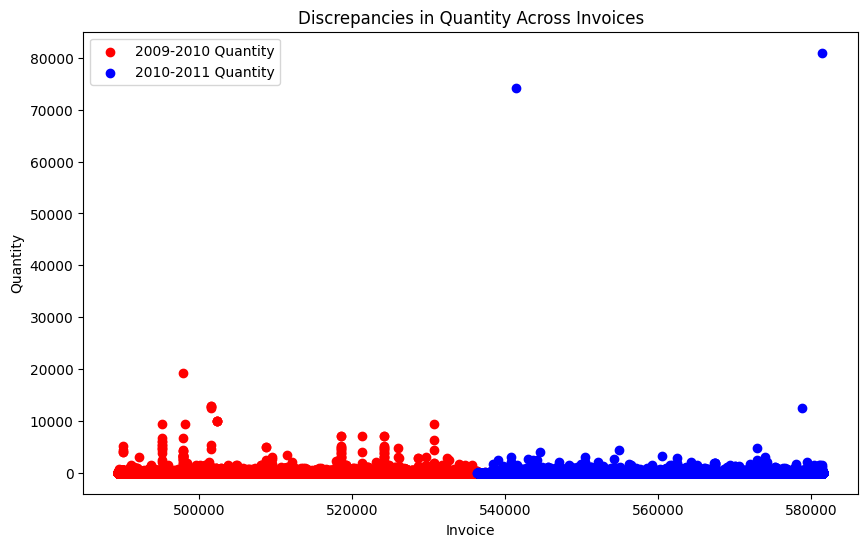

In [26]:
# Plot discrepancies in Quantity between the two years
plt.figure(figsize=(10, 6))

x = pd.to_numeric(discrepancies['Invoice'], errors='coerce')

plt.scatter(x, discrepancies['Quantity_2009_2010'], color='red', label='2009-2010 Quantity')
plt.scatter(x, discrepancies['Quantity_2010_2011'], color='blue', label='2010-2011 Quantity')
plt.xlabel('Invoice')
plt.ylabel('Quantity')
plt.title('Discrepancies in Quantity Across Invoices')
plt.legend()
plt.show()

**Step 6: Automating Reconciliation and Reporting**

Let’s automate the process of reconciling the data. We can write a Python function that will:

Identify and correct discrepancies.
Generate a reconciliation report.

In [27]:
def reconcile_data_and_generate_report(df1, df2, output_report='reconciliation_report.xlsx'):
    reconciled_data = pd.merge(df1, df2, on=['Invoice', 'StockCode', 'Customer ID'], how='outer', suffixes=('_2009_2010', '_2010_2011'))

    discrepancies = reconciled_data[(reconciled_data['Quantity_2009_2010'] != reconciled_data['Quantity_2010_2011']) |
                                    (reconciled_data['Price_2009_2010'] != reconciled_data['Price_2010_2011'])]

    discrepancies.to_excel(output_report, index=False)

    print(f"Reconciliation complete. {len(discrepancies)} discrepancies found. Report saved to {output_report}.")

reconcile_data_and_generate_report(df_2009_2010_clean, df_2010_2011_clean)


Reconciliation complete. 783924 discrepancies found. Report saved to reconciliation_report.xlsx.


**Step 7: Final Summary**

In [28]:
total_invoices_2009_2010 = df_2009_2010_clean['Invoice'].nunique()
total_invoices_2010_2011 = df_2010_2011_clean['Invoice'].nunique()

print(f"Total Invoices in 2009-2010: {total_invoices_2009_2010}")
print(f"Total Invoices in 2010-2011: {total_invoices_2010_2011}")
print(f"Number of discrepancies reconciled: {len(discrepancies)}")

Total Invoices in 2009-2010: 23587
Total Invoices in 2010-2011: 22190
Number of discrepancies reconciled: 783924
